# STAGE 4: ANALYZE - Trip Counts and Median Trip Duration by Hour of Day and Day of Week for Rider Types

 Observe difference of casual and member riders behaviors by aggregating data by day of week, hour of day,


#### Ingest the big csv to get ready for analysis

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

dtypes = {'ride_id': 'str', 'rideable_type': 'category',  'start_station_id': 'category', 
            'end_station_id': 'category', 'member_casual': 'category'}
usecols = ['ride_id', 'rideable_type',  #'start_station_id', 'end_station_id',
             'member_casual','started_at','ended_at'#,'start_lat','start_lng','end_lat','end_lng'
          ]

# this is a function to read the trip files,
def read_csv_to_df(filename, dtype, usecols):
    df = pd.read_csv(filename, parse_dates=['started_at','ended_at'], dtype = dtype, usecols=usecols)
    print (filename,df.memory_usage(deep=True).sum()/1e+6, " Mbytes")
    return df

dfbig = read_csv_to_df('dfbig.csv', dtypes, usecols)

dfbig.csv 918.326176  Mbytes


In [3]:
def yearmonth(d):
    from datetime import datetime
    return d.strftime('%Y%m')

dfbig['Ym']=dfbig['started_at'].apply(yearmonth)
dfbig['hr']=dfbig['started_at'].dt.hour
dfbig['weekday']=dfbig['started_at'].dt.dayofweek
dfbig['duration']=(dfbig['ended_at']-dfbig['started_at']).dt.total_seconds()/60

## Make HeatMap to compare ride count by hour of day

In [4]:
dfbigplot = dfbig.groupby(['Ym','member_casual','hr','weekday'])['ride_id'].count()
dfbigplot.name ='ride_count'
dfbigplot.head()
dfbigplot1 = dfbigplot.reset_index()

In [5]:
#dfbigplot1.to_csv('ride_count_by_Ym_by_Hr_by_weekday.csv')

In [7]:
dfbigplot1['ride_count'].max()

7412

In [8]:
vmin=0
vmax=6000

In [9]:
heatmap_pt_member_hr = pd.pivot_table(dfbigplot1[dfbigplot1['member_casual']=='member'],values ='ride_count', index=['hr'], columns='Ym')
heatmap_pt_casual_hr = pd.pivot_table(dfbigplot1[dfbigplot1['member_casual']=='casual'],values ='ride_count', index=['hr'], columns='Ym')

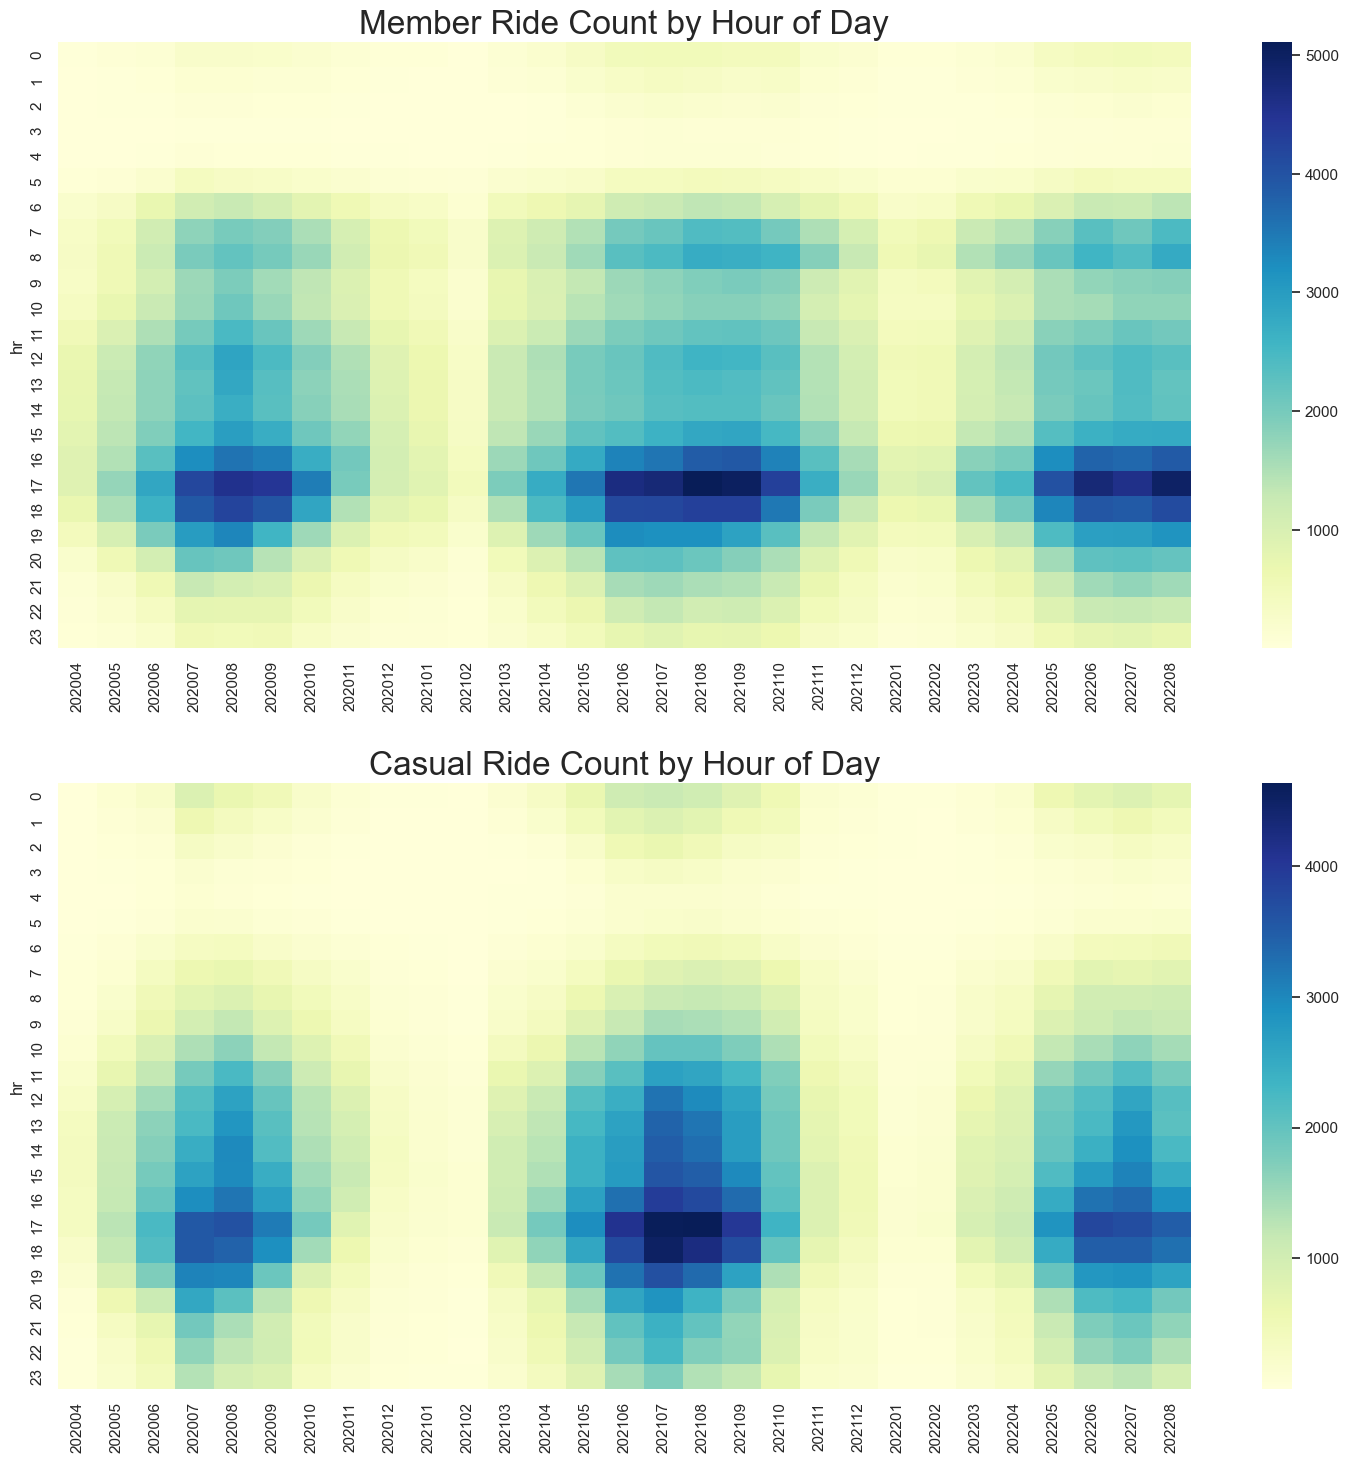

In [42]:
vmin=0
vmax=6000
fig, ax = plt.subplots(2, figsize=(15,15),  sharey=True)
sns.set()
sns.heatmap(heatmap_pt_member_hr, cmap='YlGnBu', ax=ax[0] )#, vmin=vmin, vmax=vmax)
sns.heatmap(heatmap_pt_casual_hr, cmap='YlGnBu', ax=ax[1] )#, vmin=vmin, vmax=vmax)
ax[0].set_title('Member Ride Count by Hour of Day', size=24)
ax[1].set_title('Casual Ride Count by Hour of Day', size=24)
plt.xticks(rotation=90)
plt.xticks(rotation=90)
fig.tight_layout()
ax[0].set_xlabel('')
ax[1].set_xlabel('')
plt.savefig('./Figures/HeatMap_Ride_Count_by_HourofDay.png', bbox_inches='tight')
plt.show()


In [13]:
heatmap_pt_member_weekday = pd.pivot_table(dfbigplot1[dfbigplot1['member_casual']=='member'],values ='ride_count', index=['weekday'], columns='Ym')
heatmap_pt_casual_weekday = pd.pivot_table(dfbigplot1[dfbigplot1['member_casual']=='casual'],values ='ride_count', index=['weekday'], columns='Ym')

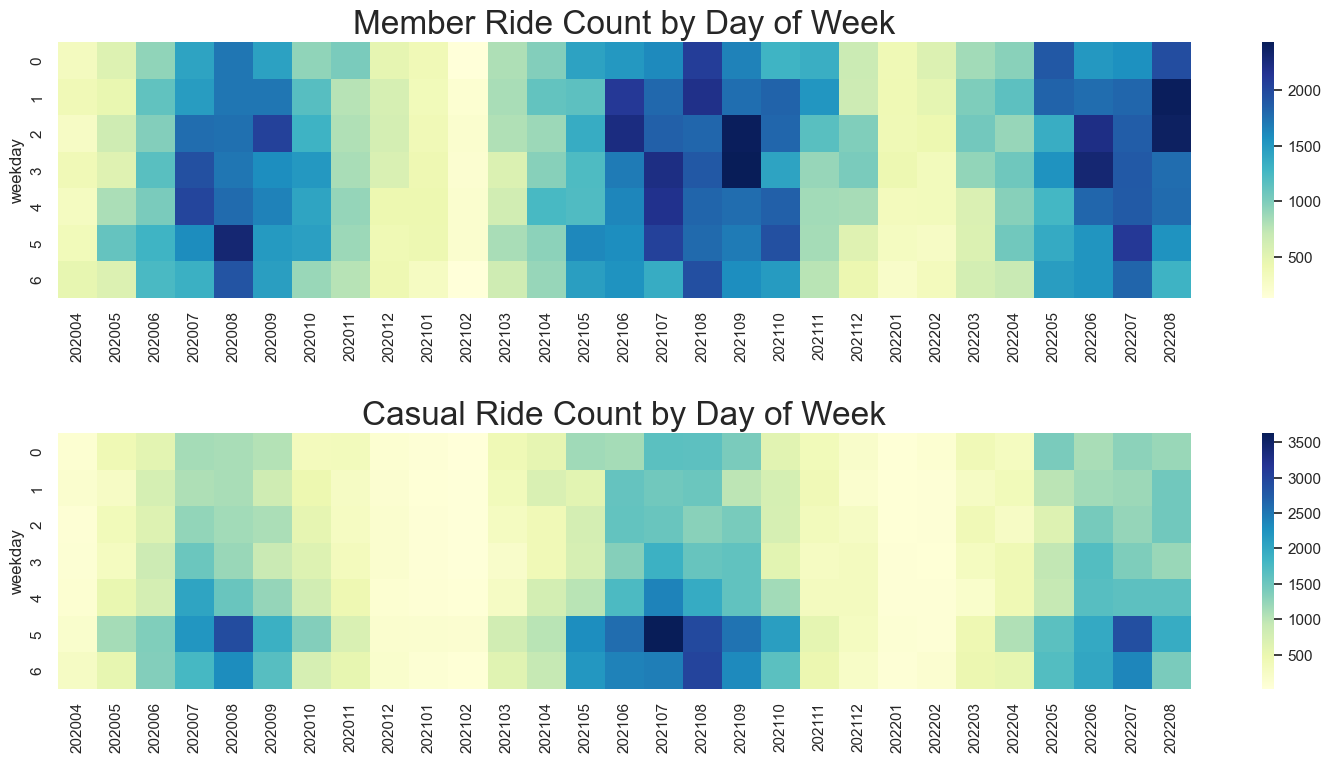

In [43]:
vmin=0
vmax=6000
fig, ax = plt.subplots(2, figsize=(15,8),  sharey=True)
sns.set()
sns.heatmap(heatmap_pt_member_weekday, cmap='YlGnBu', ax=ax[0])#, vmin=vmin, vmax=vmax)
sns.heatmap(heatmap_pt_casual_weekday, cmap='YlGnBu', ax=ax[1])#, vmin=vmin, vmax=vmax)
ax[0].set_title('Member Ride Count by Day of Week', size=24)
ax[1].set_title('Casual Ride Count by Day of Week', size=24)
plt.xticks(rotation=90)
plt.xticks(rotation=90)
fig.tight_layout()
ax[0].set_xlabel('')
ax[1].set_xlabel('')
plt.savefig('./Figures/HeatMap_Ride_Count_by_DayofWeek.png', bbox_inches='tight')
plt.show()


### Make HeatMap to compare ride duration by hour of day during work days

In [16]:
dfbigplot_duration = dfbig.groupby(['Ym','member_casual','hr','weekday'])['duration'].median()
dfbigplot_duration.name ='median_duration'
dfbigplot_duration = dfbigplot_duration.reset_index()

In [17]:
#dfbigplot_duration.to_csv('ride_median_duration_by_Ym_by_Hr_by_weekday.csv')

In [34]:
heatmap_pt_member_duration_hr = pd.pivot_table(dfbigplot_duration[dfbigplot_duration['member_casual']=='member'],values ='median_duration', index=['hr'], columns='Ym')
heatmap_pt_casual_duration_hr = pd.pivot_table(dfbigplot_duration[dfbigplot_duration['member_casual']=='casual'],values ='median_duration', index=['hr'], columns='Ym')

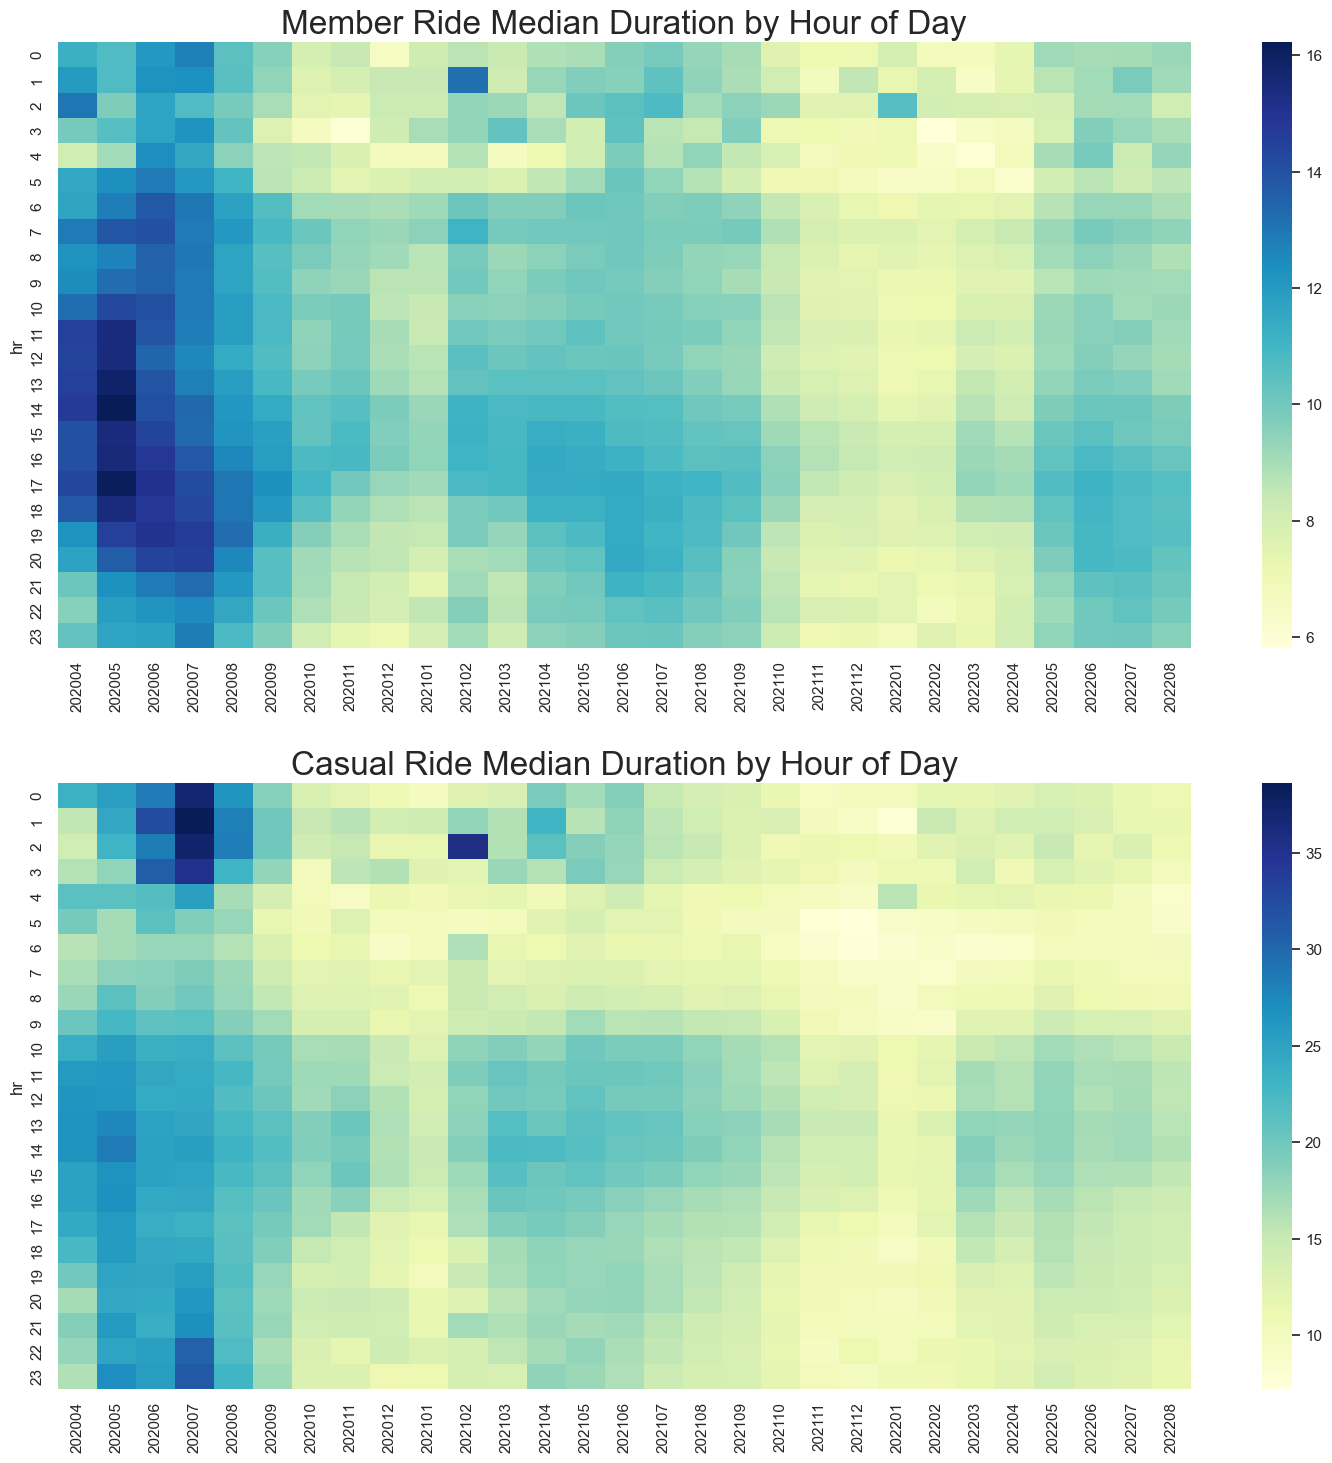

In [44]:
vmin = 0
vmax = 30
fig, ax = plt.subplots(2, figsize=(15,15),  sharey=True)
sns.set()
sns.heatmap(heatmap_pt_member_duration_hr, cmap='YlGnBu', ax=ax[0])#, vmin=vmin, vmax=vmax)
sns.heatmap(heatmap_pt_casual_duration_hr, cmap='YlGnBu', ax=ax[1])#, vmin=vmin, vmax=vmax)
ax[0].set_title('Member Ride Median Duration by Hour of Day', size=24)
ax[1].set_title('Casual Ride Median Duration by Hour of Day', size=24)
plt.xticks(rotation=90)
plt.xticks(rotation=90)
fig.tight_layout()
ax[0].set_xlabel('')
ax[1].set_xlabel('')
plt.savefig('./Figures/HeatMap_Ride_MedianDuration_by_HourofDay.png', bbox_inches='tight')
plt.show()

In [38]:
heatmap_pt_member_duration_weekday = pd.pivot_table(dfbigplot_duration[dfbigplot_duration['member_casual']=='member'],values ='median_duration', index=['weekday'], columns='Ym')
heatmap_pt_casual_duration_weekday = pd.pivot_table(dfbigplot_duration[dfbigplot_duration['member_casual']=='casual'],values ='median_duration', index=['weekday'], columns='Ym')

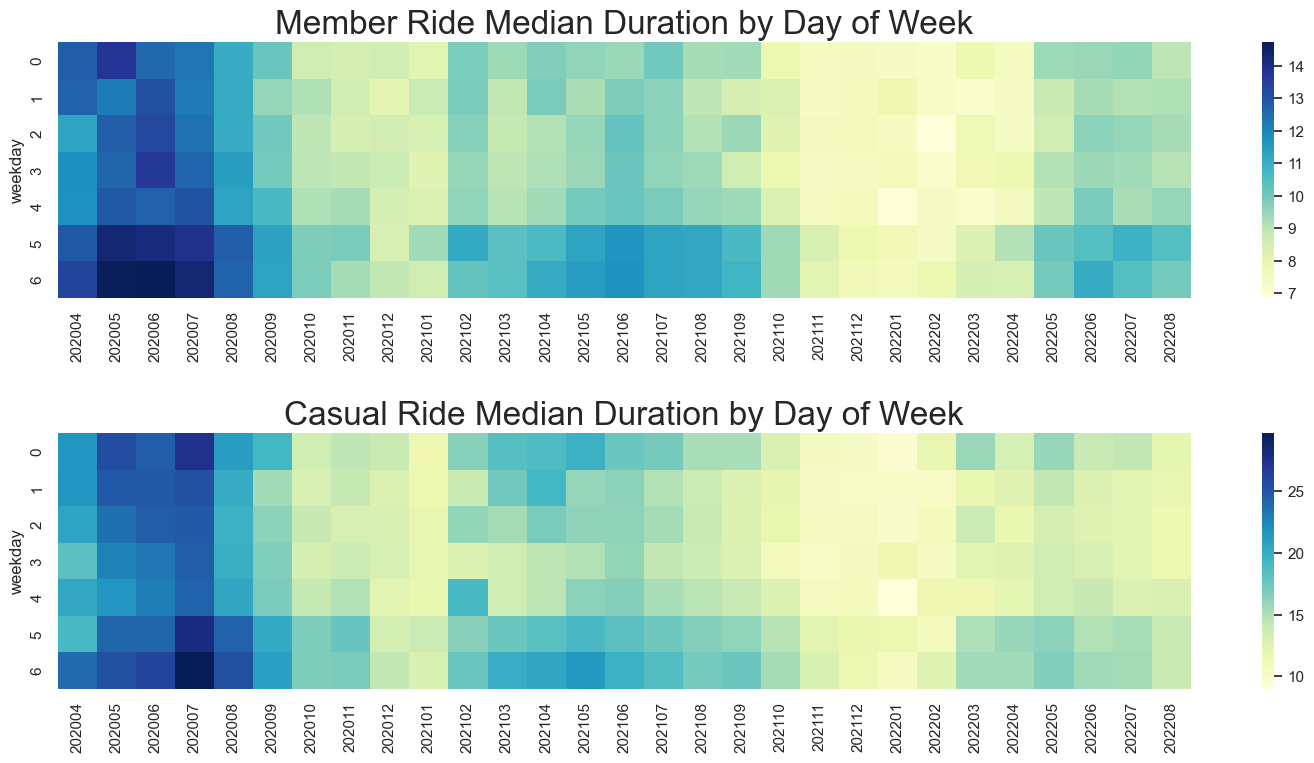

In [45]:
vmin = 0
vmax = 30
fig, ax = plt.subplots(2, figsize=(15,8),  sharey=True)
sns.set()
sns.heatmap(heatmap_pt_member_duration_weekday, cmap='YlGnBu', ax=ax[0])#, vmin=vmin, vmax=vmax)
sns.heatmap(heatmap_pt_casual_duration_weekday, cmap='YlGnBu', ax=ax[1])#, vmin=vmin, vmax=vmax)
ax[0].set_title('Member Ride Median Duration by Day of Week', size=24)
ax[1].set_title('Casual Ride Median Duration by Day of Week', size=24)
plt.xticks(rotation=90)
plt.xticks(rotation=90)
fig.tight_layout()
ax[0].set_xlabel('')
ax[1].set_xlabel('')
plt.savefig('./Figures/HeatMap_Ride_MedianDuration_by_DayofWeek.png', bbox_inches='tight')
plt.show()